# Import Library dan Dataset

In [1]:
import numpy as np # library untuk operasi numerik
import pandas as pd # library untuk manipulasi dan analisis data

import matplotlib.pyplot as plt # library untuk visualisasi data
import seaborn as sns # library untuk visualisasi data statistik

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Ardavaa/GDG-feature-eng-data-prep/refs/heads/main/dataset-penugasan/MBP.csv") #Membaca file csv sesuai Dir Path

df.head(10) # melihat 10 data teratas

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
5,"POCO M4 5G (Power Black, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
6,"POCO C55 (Power Black, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
7,"POCO C55 (Forest Green, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
8,"POCO C55 (Cool Blue, 128 GB)",4.1,"13,647",6 GB RAM,128 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹9,249",2023-06-17
9,"POCO M4 5G (Yellow, 128 GB)",4.2,"40,525",6 GB RAM,128 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹13,999",2023-06-17


##### Untuk mengetahui dimensi dataset (jumlah baris dan kolom), kita akan memeriksa shape-nya.

In [3]:
df.shape # Shape=Dimensi Data (jumlah baris dan kolom)

(1836, 11)

#### Kita perlu memastikan tipe data setiap kolom pada dataset sudah sesuai dengan format nilainya.

In [4]:
# Menampilkan informasi ringkas tentang DataFrame, termasuk jumlah baris, nama kolom, tipe data, dan jumlah nilai non-null.
df.info() 

# Menampilkan nama-nama kolom yang ada pada DataFrame.
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), object(10)
memory usage: 157.9+ KB


Index(['Phone Name', 'Rating ?/5', 'Number of Ratings', 'RAM', 'ROM/Storage',
       'Back/Rare Camera', 'Front Camera', 'Battery', 'Processor',
       'Price in INR', 'Date of Scraping'],
      dtype='object')

# Data Cleaning

In [5]:
df.duplicated().sum() # Menghitung jumlah baris duplikat dalam DataFrame.

np.int64(69)

##### Menampilkan baris duplikat

In [6]:
df[df.duplicated(keep=False)] # keep=False untuk menampilkan semua duplikat

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
45,"POCO C31 (Shadow Gray, 64 GB)",4.3,"2,22,992",4 GB RAM,64 GB ROM,13MP + 2MP + 2MP,5MP Front Camera,5000 mAh,MediaTek Helio G35 Processor,"₹8,999",2023-06-17
50,"POCO C31 (Shadow Gray, 64 GB)",4.3,"2,22,992",4 GB RAM,64 GB ROM,13MP + 2MP + 2MP,5MP Front Camera,5000 mAh,MediaTek Helio G35 Processor,"₹8,999",2023-06-17
94,"POCO M3 (Yellow, 64 GB)",4.3,"1,25,650",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP,8MP Front Camera,6000 mAh,Qualcomm Snapdragon 662 Processor,"₹11,999",2023-06-17
95,"POCO M2 (Slate Blue, 64 GB)",4.4,"4,09,478",6 GB RAM,64 GB ROM,13MP + 8MP + 5MP + 2MP,8MP Front Camera,5000 mAh,MediaTek Helio G80 Processor,"₹12,999",2023-06-17
96,"POCO M3 (Yellow, 64 GB)",4.3,"1,25,650",4 GB RAM,64 GB ROM,48MP + 2MP + 2MP,8MP Front Camera,6000 mAh,Qualcomm Snapdragon 662 Processor,"₹11,999",2023-06-17
...,...,...,...,...,...,...,...,...,...,...,...
1740,"Infinix NOTE 12i (Metaverse Blue, 64 GB)",4.2,"5,955",4 GB RAM,64 GB ROM,50 MP + 2 MP + QVGA,8MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹10,499",2023-06-17
1763,"Infinix Smart 6 (Light Sea Green, 64 GB)",4.3,"32,464",2 GB RAM,64 GB ROM,8 MP + Depth Lens,5MP Front Camera,5000 mAh,Mediatek Helio A22 Processor,"₹6,999",2023-06-17
1764,"Infinix Smart 6 (Light Sea Green, 64 GB)",4.3,"32,464",2 GB RAM,64 GB ROM,8 MP + Depth Lens,5MP Front Camera,5000 mAh,Mediatek Helio A22 Processor,"₹6,999",2023-06-17
1811,"Infinix Smart 5 (Obsidian Black, 32 GB)",4.3,"1,07,450",2 GB RAM,32 GB ROM,13MP + Low Light Sensor,8MP Front Camera,6000 mAh,MediaTek Helio G25 Processor,"₹7,499",2023-06-17


##### Penanganan Data Duplikat

Kodingan sebelumnya menunjukkan adanya 138 baris duplikat dalam dataset.  Data duplikat dapat berdampak negatif pada model Machine Learning, seperti:

* **Bias:** Model cenderung memberikan bobot lebih pada data yang muncul berulang.
* **Overfitting:** Model terlalu menyesuaikan diri dengan data latih, termasuk data duplikat, sehingga kinerjanya buruk pada data baru.

Untuk mengatasi hal ini, kita akan menghapus baris duplikat menggunakan  `df = df.drop_duplicates()`. Fungsi ini akan menghapus semua baris duplikat kecuali satu, sehingga dataset menjadi lebih bersih dan representatif.

In [7]:
df = df.drop_duplicates() # Menghapus baris duplikat dari DataFrame.
df.duplicated().sum() 

np.int64(0)

##### Mengecek Data Null atau nilai yang hilang (bukan nol)

In [8]:
df.isnull().sum() #Menghitung jumlah nilai null (missing values) pada setiap kolom DataFrame.

Phone Name             0
Rating ?/5             0
Number of Ratings      0
RAM                    0
ROM/Storage          162
Back/Rare Camera       8
Front Camera         381
Battery                9
Processor             49
Price in INR           0
Date of Scraping       0
dtype: int64

In [9]:
# Menampilkan DataFrame yang memiliki nilai Null / NaN  
df[df.isnull().any(axis=1)]  # axis=1 untuk  memeriksa kolom pada setiap baris sedangkan axis=0 memeriksa baris pada setiap kolom.

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
148,"realme narzo 50i Prime (Mint Green, 32 GB)",4.2,127,3 GB RAM,32 GB ROM,8MP Rear Camera,NaN,5000 mAh,Unisoc Tiger T612 (12 nm) Processor,"₹7,076",2023-06-17
159,"realme Narzo N55 (Prime Blue, 128 GB)",4.3,359,6 GB RAM,128 GB ROM,64MP Rear Camera,NaN,5000 mAh,1 Year Domestic Warranty for Phone and 6 Month...,"₹13,399",2023-06-17
169,"realme Narzo N55 (Prime Black, 128 GB)",4.3,359,6 GB RAM,128 GB ROM,64MP Rear Camera,NaN,5000 mAh,1 Year Domestic Warranty for Phone and 6 Month...,"₹13,589",2023-06-17
198,"realme NARZO 50A PRIME (FLASH BLUE, 64 GB)",4.1,"1,238",4 GB RAM,64 GB ROM,50MP Rear Camera,NaN,5000 mAh,1 YEAR ON MOBILE AND 6 MONTHS FOR ACCESORIES,"₹11,300",2023-06-17
202,"realme Narzo 50A Prime (Flash Blue, 128 GB)",4.1,"1,238",4 GB RAM,128 GB ROM,50MP Rear Camera,NaN,5000 mAh,12 Months Brand Warranty,"₹11,979",2023-06-17
...,...,...,...,...,...,...,...,...,...,...,...
1681,Alcatel ONE TOUCH 506,3.0,5,2 MB ROM,NaN,2MP Rear Camera,NaN,650 mAh,1 Year for Mobile & 6 Months for Accessories,"₹2,490",2023-06-17
1683,"Alcatel One Touch Glory 2T (White, 100 MB)",4.1,21,256 MB RAM,100 MB ROM,2MP Rear Camera,NaN,1400 mAh,1 Year for Mobile & 6 Months for Accessories,"₹4,350",2023-06-17
1684,Alcatel OT808,4.0,22,80 MB ROM,Expandable Upto 8 GB,2MP Rear Camera,NaN,850 mAh,1 Year for Mobile & 6 Months for Accessories,"₹6,450",2023-06-17
1685,Alcatel ONE TOUCH 813D,4.5,22,50 MB ROM,Expandable Upto 16 GB,2MP Rear Camera,NaN,1000 mAh,1 Year for Mobile & 6 Months for Accessories,"₹4,990",2023-06-17


### Penanganan Nilai Null

Pada dataset ini, nilai null dilambangkan dengan "NaN".  Setelah mempertimbangkan karakteristik dataset, diputuskan bahwa baris dengan nilai null akan dihapus daripada diisi. Berikut alasannya:

* Beberapa kolom, seperti "Front Camera", memiliki persentase nilai null yang tinggi. Mengisi nilai null pada kolom tersebut dapat  menimbulkan bias pada data.
* Variabel-variabel seperti RAM, ROM, dan spesifikasi kamera memiliki nilai yang spesifik. Mengisi nilai null dengan rata-rata atau nilai lain  dapat mengaburkan makna dan  mempengaruhi analisis.
* Dataset ini memiliki lebih dari 1.800 baris. Menghapus sebagian kecil baris yang mengandung nilai null tidak akan mengurangi jumlah data secara signifikan.
* Mengisi nilai null, terutama pada variabel yang saling terkait (misalnya, harga dan spesifikasi), dapat mengganggu  hubungan antar variabel dan  menghasilkan analisis yang kurang akurat.

Oleh karena itu, menghapus baris dengan nilai null merupakan strategi yang lebih tepat untuk menjaga kualitas dan integritas data.

In [10]:
df = df.dropna() # Menghapus semua baris yang mengandung nilai null
df.isnull().sum() # Menghitung jumlah nilai null pada setiap kolom setelah dihapus

Phone Name           0
Rating ?/5           0
Number of Ratings    0
RAM                  0
ROM/Storage          0
Back/Rare Camera     0
Front Camera         0
Battery              0
Processor            0
Price in INR         0
Date of Scraping     0
dtype: int64

In [11]:
# Mengubah nama beberapa kolom pada DataFrame.
df.rename(columns={'Phone Name': 'Phone','Rating ?/5':'Rating' ,'ROM/Storage': 'ROM', 'Back/Rare Camera': 'Back Camera'}, inplace=True)

# Menampilkan informasi baru dari DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1252 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone              1252 non-null   object 
 1   Rating             1252 non-null   float64
 2   Number of Ratings  1252 non-null   object 
 3   RAM                1252 non-null   object 
 4   ROM                1252 non-null   object 
 5   Back Camera        1252 non-null   object 
 6   Front Camera       1252 non-null   object 
 7   Battery            1252 non-null   object 
 8   Processor          1252 non-null   object 
 9   Price in INR       1252 non-null   object 
 10  Date of Scraping   1252 non-null   object 
dtypes: float64(1), object(10)
memory usage: 117.4+ KB


# Data Pre-processing + Feature Engineering

In [12]:
drop_col = ['Date of Scraping'] # Menentukan kolom yang akan dihapus.
df.drop(columns=drop_col, inplace=True) # Menghapus kolom 'Date of Scraping' dari DataFrame.

##### Alasan Menghapus Kolom 'Date of Scraping'

* Informasi tanggal pengambilan data tidak memiliki pengaruh signifikan terhadap analisis harga atau spesifikasi ponsel. 
* Menghapus kolom yang tidak relevan membantu menyederhanakan dataset tanpa menghilangkan informasi penting. Hal ini dapat meningkatkan efisiensi komputasi

### Kita akan mengecek nilai dan melakukan preprocess pada setiap kolom.

In [13]:
df['Phone'].unique() #Melihat daftar unik nama HP.

array(['POCO C50 (Royal Blue, 32 GB)', 'POCO M4 5G (Cool Blue, 64 GB)',
       'POCO C51 (Royal Blue, 64 GB)', ...,
       'Infinix Note 7 (Aether Black, 64 GB)',
       'Infinix Zero 8i (Silver Diamond, 128 GB)',
       'Infinix S5 (Quetzal Cyan, 64 GB)'], shape=(1102,), dtype=object)

#### Preprocessing Kolom Nama HP

Kolom `Nama HP` di-preprocess untuk mengambil **hanya merek ponsel (string pertama)**. Karena:

* Setiap merek memiliki banyak tipe ponsel dengan spesifikasi yang berbeda-beda. Informasi tipe ponsel  dianggap tidak relevan untuk analisis ini.
* Informasi mengenai storage (ROM) sudah tersedia di kolom `ROM`. 
* Warna ponsel tidak memiliki pengaruh signifikan terhadap prediksi harga. 

In [14]:
df['Phone'] = df['Phone'].str.split().str[0] # Mengambil string pertama dari setiap nilai pada kolom 'Phone'.
df['Phone'] # Menampilkan kolom 'Phone' setelah diproses.

0          POCO
1          POCO
2          POCO
3          POCO
4          POCO
         ...   
1831    Infinix
1832    Infinix
1833    Infinix
1834    Infinix
1835    Infinix
Name: Phone, Length: 1252, dtype: object

In [15]:
df.dtypes # Menampilkan tipe data dari setiap kolom pada DataFrame.

Phone                 object
Rating               float64
Number of Ratings     object
RAM                   object
ROM                   object
Back Camera           object
Front Camera          object
Battery               object
Processor             object
Price in INR          object
dtype: object

In [16]:
df['Number of Ratings'] #Menampilkan kolom 'Number of Ratings'

0       33,561
1       77,128
2       15,175
3       22,621
4       15,175
         ...  
1831    25,582
1832    25,582
1833    25,582
1834     7,117
1835    15,701
Name: Number of Ratings, Length: 1252, dtype: object

#### Preprocessing Kolom 'Number of Ratings'

Kolom `Number of Ratings` saat ini bertipe data `object` dan menggunakan koma (,) sebagai pemisah ribuan. Maka kita perlu melakukan:

1. Menghapus koma (,).
2. Mengubah tipe data menjadi integer.

In [17]:
# Membersihkan dan mengubah tipe data kolom 'Number of Ratings'.
df['Number of Ratings'] = df['Number of Ratings'].str.replace(',', '').astype(int)

In [18]:
# Menghitung frekuensi kemunculan setiap nilai unik pada kolom 'RAM'.
df['RAM'].value_counts()

RAM
4 GB RAM      341
8 GB RAM      338
6 GB RAM      265
3 GB RAM      153
2 GB RAM       90
12 GB RAM      46
1 GB RAM       12
512 MB RAM      4
8 MB RAM        1
16 MB RAM       1
1.5 GB RAM      1
Name: count, dtype: int64

#### Preprocessing Kolom 'RAM'

Menghapus nilai RAM seperti "1 GB RAM", "512 MB RAM", dan lainnya dilakukan karena:
- RAM kecil jarang ditemukan pada ponsel saat ini


In [19]:
# Daftar nama RAM yang ingin dihapus
ram_to_remove = ["1 GB RAM", "512 MB RAM", "8 MB RAM", "16 MB RAM", "1.5 GB RAM"]

In [20]:
# Menghapus baris yang memiliki RAM dalam ram_to_remove
df = df[~df['RAM'].isin(ram_to_remove)]

In [21]:
df['RAM'].value_counts()

RAM
4 GB RAM     341
8 GB RAM     338
6 GB RAM     265
3 GB RAM     153
2 GB RAM      90
12 GB RAM     46
Name: count, dtype: int64

In [22]:
# Membersihkan dan mengubah tipe data kolom 'RAM'.
df['RAM'] = df['RAM'].str.split().str[0]  # Mengambil angka dari nilai RAM
df['RAM'] = df['RAM'].astype(int)  # Mengubah tipe data menjadi integer

In [23]:
df # Menampilkan DataFrame

,Phone,Rating,Number of Ratings,RAM,ROM,Back Camera,Front Camera,Battery,Processor,Price in INR
0,POCO,4.2,33561,2,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649"
1,POCO,4.2,77128,4,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999"
2,POCO,4.3,15175,4,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999"
3,POCO,4.2,22621,4,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749"
4,POCO,4.3,15175,4,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999"
...,...,...,...,...,...,...,...,...,...,...
1831,Infinix,4.3,25582,4,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999"
1832,Infinix,4.3,25582,4,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999"
1833,Infinix,4.3,25582,4,64 GB ROM,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999"
1834,Infinix,4.2,7117,8,128 GB ROM,48MP + 8MP + 2MP + AI Lens Camera,16MP + 8MP Dual Front Camera,4500 mAh,MediaTek Helio G90T Processor,"₹18,999"


In [24]:
# Menampilkan frekuensi kemunculan setiap nilai unik pada kolom 'ROM'.
df['ROM'].value_counts()

ROM
128 GB ROM    541
64 GB ROM     355
32 GB ROM     179
256 GB ROM    126
16 GB ROM      26
512 GB ROM      4
8 GB ROM        2
Name: count, dtype: int64

In [25]:
# Daftar nama ROM yang ingin dihapus
rom_to_remove = ["8 GB ROM"]

In [26]:
# Menghapus baris yang memiliki RAM dalam ram_to_remove
df = df[~df['ROM'].isin(rom_to_remove)]

In [27]:
df['ROM'] = df['ROM'].str.split().str[0]  # Mengambil angka dari nilai ROM
df['ROM'] = df['ROM'].astype(int)  # Mengubah tipe data menjadi integer

/tmp/ipykernel_11805/1768505869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROM'] = df['ROM'].str.split().str[0]  # Mengambil angka dari nilai ROM
/tmp/ipykernel_11805/1768505869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROM'] = df['ROM'].astype(int)  # Mengubah tipe data menjadi integer


In [28]:
df['ROM'].value_counts()

ROM
128    541
64     355
32     179
256    126
16      26
512      4
Name: count, dtype: int64

In [29]:
df # Menampilkan DataFrame

,Phone,Rating,Number of Ratings,RAM,ROM,Back Camera,Front Camera,Battery,Processor,Price in INR
0,POCO,4.2,33561,2,32,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649"
1,POCO,4.2,77128,4,64,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999"
2,POCO,4.3,15175,4,64,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999"
3,POCO,4.2,22621,4,64,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749"
4,POCO,4.3,15175,4,64,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999"
...,...,...,...,...,...,...,...,...,...,...
1831,Infinix,4.3,25582,4,64,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999"
1832,Infinix,4.3,25582,4,64,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999"
1833,Infinix,4.3,25582,4,64,48MP + 2MP + 2MP + AI Lens Camera,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999"
1834,Infinix,4.2,7117,8,128,48MP + 8MP + 2MP + AI Lens Camera,16MP + 8MP Dual Front Camera,4500 mAh,MediaTek Helio G90T Processor,"₹18,999"


In [30]:
# Menampilkan frekuensi kemunculan setiap nilai unik pada kolom 'Back Camera'.
df['Back Camera'].value_counts()

Back Camera
13MP + 2MP                                       77
50MP + 2MP + 2MP                                 76
64MP + 8MP + 2MP                                 76
50MP + 2MP                                       69
8MP Rear Camera                                  55
                                                 ..
16MP + 5MP + 8MP                                  1
200MP + 13MP + 2MP                                1
48 MP + 13 MP Portrait Lens + 2 MP Bokeh Lens     1
48MP + 8MP + 2MP + AI Lens Camera                 1
16MP + 5MP + 2MP + Low Light Sensor               1
Name: count, Length: 145, dtype: int64

#### Preprocessing Kolom `Back Camera`

Kolom `Back Camera`  memiliki data yang beragam. Untuk menyederhanakannya, kita akan fokus pada **ukuran kamera dengan megapixel terbesar** dan menambahkan kolom baru untuk **jumlah kamera belakang**.

Dengan melakukan:

   - Mengambil angka dari nilai `Back Camera` yang menunjukkan ukuran kamera utama (dalam MP).
   - Membersihkan dan menstandarisasi nilai, termasuk menghapus "MP" atau "Mp" dan mengganti beberapa nilai (misalnya, "12.2" menjadi "12").
   - Mengubah tipe data menjadi integer.

In [31]:
# Membuat kolom baru 'Size Cam Blkg' yang berisi ukuran kamera belakang utama (dalam MP).
df['Size Cam Blkg'] = df['Back Camera'].str.split().str[0].str.replace('MP', '').str.replace('Mp', '')
df['Size Cam Blkg'] = df['Size Cam Blkg'].str.replace('12.2','12').str.replace('12.3','12').str.replace('0.3','1').astype(int)

# Fungsi untuk menghitung jumlah kamera belakang berdasarkan string.
def hitung_cam(string_cam):
    if "Dual" in string_cam:
        return 2
    else:
        hitung_plus = string_cam.count('+')
        return hitung_plus + 1

# Membuat kolom baru 'Total Cam Blkg' yang berisi jumlah kamera belakang.
df['Total Cam Blkg'] = df['Back Camera'].apply(lambda x: hitung_cam(x))

# Menghapus kolom 'Back Camera' yang asli.
drpro = ['Back Camera']
df.drop(columns=drpro, inplace=True)

/tmp/ipykernel_11805/1526796684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size Cam Blkg'] = df['Back Camera'].str.split().str[0].str.replace('MP', '').str.replace('Mp', '')
/tmp/ipykernel_11805/1526796684.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size Cam Blkg'] = df['Size Cam Blkg'].str.replace('12.2','12').str.replace('12.3','12').str.replace('0.3','1').astype(int)
/tmp/ipykernel_11805/1526796684.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [32]:
df #Menampilkan DataFrame

,Phone,Rating,Number of Ratings,RAM,ROM,Front Camera,Battery,Processor,Price in INR,Size Cam Blkg,Total Cam Blkg
0,POCO,4.2,33561,2,32,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",8,2
1,POCO,4.2,77128,4,64,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",50,2
2,POCO,4.3,15175,4,64,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",8,2
3,POCO,4.2,22621,4,64,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",50,2
4,POCO,4.3,15175,4,64,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",8,2
...,...,...,...,...,...,...,...,...,...,...,...
1831,Infinix,4.3,25582,4,64,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",48,4
1832,Infinix,4.3,25582,4,64,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",48,4
1833,Infinix,4.3,25582,4,64,16MP Front Camera,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",48,4
1834,Infinix,4.2,7117,8,128,16MP + 8MP Dual Front Camera,4500 mAh,MediaTek Helio G90T Processor,"₹18,999",48,4


In [33]:
# Menampilkan frekuensi kemunculan setiap nilai unik pada kolom 'Front Camera'.
df['Front Camera'].value_counts()

Front Camera
16MP Front Camera               327
8MP Front Camera                298
5MP Front Camera                248
32MP Front Camera                97
13MP Front Camera                69
20MP Front Camera                56
20MP + 2MP Dual Front Camera     14
50MP Front Camera                14
12MP Front Camera                13
32MP + 8MP Dual Front Camera     12
44MP Front Camera                11
10.8MP Front Camera               9
10MP Front Camera                 8
50MP + 8MP Dual Front Camera      8
2MP Front Camera                  7
25MP Front Camera                 6
44MP + 2MP Dual Front Camera      5
60MP Front Camera                 5
16MP + 2MP Dual Front Camera      4
16MP + 8MP Dual Front Camera      3
4MP Front Camera                  3
60 MP with OIS                    3
24MP Front Camera                 3
32MP + 2MP Dual Front Camera      2
8MP + 2MP Dual Front Camera       2
16MP Dual Front Camera            2
8MP + 8MP Dual Front Camera       1
13MP + 5MP Dual

#### Preprocessing Kolom `Front Camera`

Pada kolom `Front Camera`, kita akan melakukan _preprocessing_ serupa dengan kolom `Back Camera`.  Informasi yang paling penting adalah **ukuran kamera depan dengan megapixel terbesar** dan **jumlah kamera depan**.

Kita melakukan:

   - Mengambil angka dari nilai `Front Camera` yang menunjukkan ukuran kamera utama (dalam MP).
   - Membersihkan dan menstandarisasi nilai, termasuk menghapus "MP" atau "Mp" dan mengganti beberapa nilai (misalnya, "10.8" menjadi "11").
   - Mengisi nilai null dengan 0.
   - Mengubah tipe data menjadi integer.

In [34]:
# Membuat kolom baru 'Size Cam Dpn' yang berisi ukuran kamera depan (dalam MP).
df['Size Cam Dpn'] = df['Front Camera'].str.split().str[0].str.replace('MP', '').str.replace('Mp', '')
df['Size Cam Dpn'] = df['Size Cam Dpn'].str.replace('10.8', '11').str.replace('0.3', '1').str.replace('1.6', '2').str.replace('1.3', '1')
df['Size Cam Dpn'].fillna(0, inplace=True)

# Mengubah tipe data kolom 'Size Cam Dpn' menjadi integer.
df['Size Cam Dpn'] = df['Size Cam Dpn'].astype(int)

# Fungsi untuk menghitung jumlah kamera depan berdasarkan string.
def hitung_camera(string_cam):
    if "Dual" in string_cam:
        return 2
    else:
        return 1  # Jika tidak ada "Dual", diasumsikan hanya 1 kamera depan

# Membuat kolom baru 'Total Cam Dpn' yang berisi jumlah kamera depan.
df['Total Cam Dpn'] = df['Front Camera'].apply(lambda x: hitung_camera(x))

# Menghapus kolom 'Front Camera' yang asli.
drpro = ['Front Camera']
df.drop(columns=drpro, inplace=True)

/tmp/ipykernel_11805/4275174135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size Cam Dpn'] = df['Front Camera'].str.split().str[0].str.replace('MP', '').str.replace('Mp', '')
/tmp/ipykernel_11805/4275174135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size Cam Dpn'] = df['Size Cam Dpn'].str.replace('10.8', '11').str.replace('0.3', '1').str.replace('1.6', '2').str.replace('1.3', '1')
/tmp/ipykernel_11805/4275174135.py:4: FutureWarning: A value is trying to be set on a copy of a DataFra

In [35]:
df # Menampilkan DataFrame

,Phone,Rating,Number of Ratings,RAM,ROM,Battery,Processor,Price in INR,Size Cam Blkg,Total Cam Blkg,Size Cam Dpn,Total Cam Dpn
0,POCO,4.2,33561,2,32,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",8,2,5,1
1,POCO,4.2,77128,4,64,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",50,2,8,1
2,POCO,4.3,15175,4,64,5000 mAh,Helio G36 Processor,"₹6,999",8,2,5,1
3,POCO,4.2,22621,4,64,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",50,2,5,1
4,POCO,4.3,15175,4,64,5000 mAh,Helio G36 Processor,"₹6,999",8,2,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1831,Infinix,4.3,25582,4,64,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",48,4,16,1
1832,Infinix,4.3,25582,4,64,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",48,4,16,1
1833,Infinix,4.3,25582,4,64,5000 mAh,MediaTek Helio G70 Processor,"₹14,999",48,4,16,1
1834,Infinix,4.2,7117,8,128,4500 mAh,MediaTek Helio G90T Processor,"₹18,999",48,4,16,2


In [36]:
# Menampilkan nilai-nilai unik yang ada pada kolom 'Battery'.
df['Battery'].unique()

array(['5000 mAh', '4500 mAh', '4000 mAh', '5160 mAh', '6000 mAh',
       '5065 mAh', '4200 mAh', '4300 mAh', '4230 mAh', '3300 mAh',
       '3900 mAh', '4700 mAh', '3700 mAh', '3000 mAh', '7000 mAh',
       '4800 mAh', '4015 mAh', '4025 mAh', '3400 mAh', '4350 mAh',
       '4310 mAh', '3200 mAh', '4020 mAh', '4410 mAh', '4270 mAh',
       '4926 mAh', '2915 mAh', '4600 mAh', '4030 mAh', '4050 mAh',
       '4810 mAh', '4830 mAh', '4870 mAh', '4450 mAh', '3315 mAh',
       '3225 mAh', '3260 mAh', '4250 mAh', '4520 mAh', '3080 mAh',
       '3120 mAh', '4100 mAh', '4850 mAh', '3030 mAh', '3010 mAh',
       '4820 mAh', '4780 mAh', '5300 mAh', '5050 mAh', '3060 mAh',
       '4950 mAh', '4400 mAh', '4610 mAh', '4115 mAh', '3800 mAh',
       '4085 mAh', '3340 mAh', '3450 mAh', '2200 mAh', '2610 mAh',
       '3760 mAh', '3500 mAh', '5200 mAh'], dtype=object)

#### Preprocessing Kolom `Battery`

Kolom `Battery` pada dataset ini memiliki nilai yang beragam dan sulit dipetakan secara langsung.  Oleh karena itu, kita akan melakukan _preprocessing_ dengan mengelompokkan kapasitas baterai secara manual.

Berikut langkah-langkah _preprocessing_ yang dilakukan:

   - Menghapus string "mAh" dari setiap nilai pada kolom `Battery`.
   - Mengubah tipe data kolom `Battery` menjadi float.
   - Mengelompokkan kapasitas baterai ke dalam rentang tertentu, seperti: 5000 mAh - 5499 mAh menjadi "5000" dan seterusnya...
   - Mengubah tipe data kolom Battery menjadi integer.



In [37]:
# Membersihkan dan mengubah tipe data kolom 'Battery'.
df['Battery'] = df['Battery'].str.replace('mAh', '').astype(float)  # Menghapus 'mAh' dan mengubah ke float

# Fungsi untuk mengelompokkan kapasitas baterai.
def pilah_pro(pro):
    if 5000 <= pro < 5500:
        return '5000'
    elif 5500 <= pro < 6000:
        return '5500'
    elif 4000 <= pro < 4500:
        return '4000'
    elif 4500 <= pro < 5000:
        return '4500'
    elif 2000 <= pro < 2500:
        return '2000'
    elif 2500 <= pro < 3000:
        return '2500'
    elif 1000 <= pro < 1500:
        return '1000'
    elif 1500 <= pro < 1900:
        return '1500'

# Menerapkan fungsi 'pilah_pro' pada kolom 'Battery'.
df['Battery'] = df['Battery'].apply(pilah_pro)

# Mengisi nilai null dengan 0 dan mengubah tipe data menjadi integer.
df['Battery'].fillna(0, inplace=True)
df['Battery'] = df['Battery'].astype(int)

/tmp/ipykernel_11805/660244476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Battery'] = df['Battery'].str.replace('mAh', '').astype(float)  # Menghapus 'mAh' dan mengubah ke float
/tmp/ipykernel_11805/660244476.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Battery'] = df['Battery'].apply(pilah_pro)
/tmp/ipykernel_11805/660244476.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will chan

#### Preprocessing Kolom `Price in INR`

Kolom `Price in INR` perlu dibersihkan dan diubah tipe datanya agar siap untuk analisis dan pemodelan.  Berikut alasannya:

* **Menghapus simbol mata uang**:  Simbol rupee India (`₹`) tidak diperlukan dalam analisis numerik dan perlu dihapus.
* **Menghapus pemisah ribuan**:  Karakter koma (`,`) yang digunakan sebagai pemisah ribuan juga perlu dihapus agar data dapat diubah menjadi tipe numerik.
* **Mengubah tipe data**:  Tipe data `object` (string) perlu diubah menjadi `float` (bilangan desimal) agar  operasi matematika dan analisis statistik dapat dilakukan pada kolom `Price in INR`.

In [38]:
# Membersihkan dan mengubah tipe data kolom 'Price in INR'.
df['Price in INR'] = df['Price in INR'].str.replace('₹', '').str.replace(',', '').astype(float)

/tmp/ipykernel_11805/3462661110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price in INR'] = df['Price in INR'].str.replace('₹', '').str.replace(',', '').astype(float)


In [39]:
# Menampilkan nilai-nilai unik yang ada pada kolom 'Processor'.
df['Processor'].unique()

array(['Mediatek Helio A22 Processor, Upto 2.0 GHz Processor',
       'Mediatek Dimensity 700 Processor', 'Helio G36 Processor',
       'Mediatek Helio G85 Processor', 'Mediatek Helio G99 Processor',
       'Mediatek Helio G96 Processor',
       'Qualcomm Snapdragon 695 Processor',
       'Mediatek Dimensity 810 Processor',
       'Qualcomm Snapdragon 778G Processor',
       'MediaTek Dimensity 700 Processor',
       'Qualcomm Snapdragon 695 5G Processor',
       'Qualcomm Snapdragon 7+ Gen 2 (4nm) Processor',
       'MediaTek Helio G35 Processor',
       'Qualcomm Snapdragon 730G Processor', 'MediaTek G35 Processor',
       'Qualcomm Snapdragon 845 Processor',
       'Qualcomm Snapdragon 870 Processor',
       'Mediatek Helio G35 Processor', 'MediaTek Helio G80 Processor',
       'Qualcomm Snapdragon 720G Processor',
       'Qualcomm Snapdragon 860 Processor',
       'Qualcomm Snapdragon 662 Processor',
       'Qualcomm Snapdragon 732G Processor',
       'MediaTek Dimensity 1200 Proce

#### Preprocessing Kolom `Processor`

Kolom `Processor` pada dataset ini mengandung informasi tentang prosesor yang digunakan oleh setiap ponsel. Namun, nilai pada kolom ini seringkali  beragam dan tidak terstandarisasi.

Langkah-langkah _preprocessing_ yang dilakukan:

- Mengambil kata pertama dari setiap nilai pada kolom `Processor`. Biasanya, kata pertama menunjukkan merek prosesor (misalnya, "Snapdragon", "Mediatek", "Exynos").

In [40]:
# Membuat kolom baru 'Upd_Processor' yang berisi merek prosesor.
df['Upd_Processor'] = df['Processor'].str.split().str[0]

# Fungsi untuk mengelompokkan merek prosesor.
def pilah_pro(pro):
    if pro == 'Qualcomm' or pro == 'Qualcomm®' or pro == 'Snapdragon' or pro == '2nd-gen':
        return 'Snapdragon'
    elif pro == 'Mediatek' or pro == 'MediaTek' or pro == 'Meditek' or pro == 'Helio':
        return 'Mediatek'
    elif pro == 'Octa-core(EXYNOS)' or pro == 'Exynos':
        return 'Exynos'
    elif pro == '1':
        return 'IOS'
    elif pro == 'HUAWEI' or pro =='Kirin' :
        return 'Huawei'
    elif pro == 'Google':
        return 'Google'
    else :
        return 'Other'

# Menerapkan fungsi 'pilah_pro' pada kolom 'Upd_Processor'.
df['Upd_Processor'] = df['Upd_Processor'].apply(pilah_pro)

# Menghapus kolom 'Processor' yang asli.
drpro = ['Processor']
df.drop(columns=drpro, inplace=True)

# Menampilkan frekuensi kemunculan setiap nilai unik pada kolom 'Upd_Processor'.
df['Upd_Processor'].value_counts()

/tmp/ipykernel_11805/4075259609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Upd_Processor'] = df['Processor'].str.split().str[0]
/tmp/ipykernel_11805/4075259609.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Upd_Processor'] = df['Upd_Processor'].apply(pilah_pro)
/tmp/ipykernel_11805/4075259609.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

Upd_Processor
Mediatek      494
Snapdragon    455
Other         197
Exynos         49
IOS            21
Google         11
Huawei          4
Name: count, dtype: int64

## Visualisasi Data
Kita akan mengvisualisasi data setelah melakukan Data Preprocessing + Feature Engineering (Opsional)

<Axes: xlabel='Phone'>

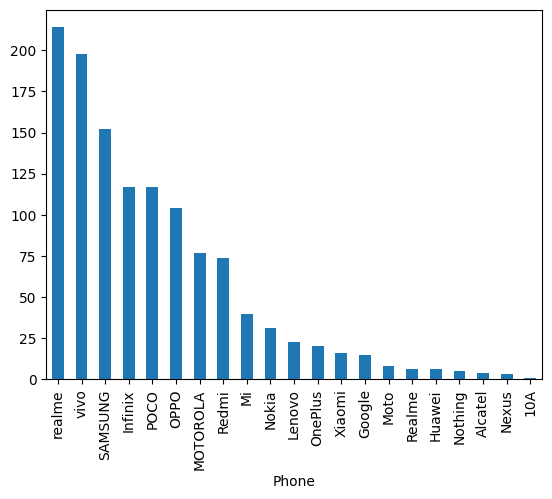

In [41]:
# Membuat plot batang (bar plot) dari frekuensi kemunculan setiap brand HP.
df['Phone'].value_counts().plot(kind='bar')

/tmp/ipykernel_11805/432758903.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price in INR'])


<Axes: xlabel='Price in INR', ylabel='Density'>

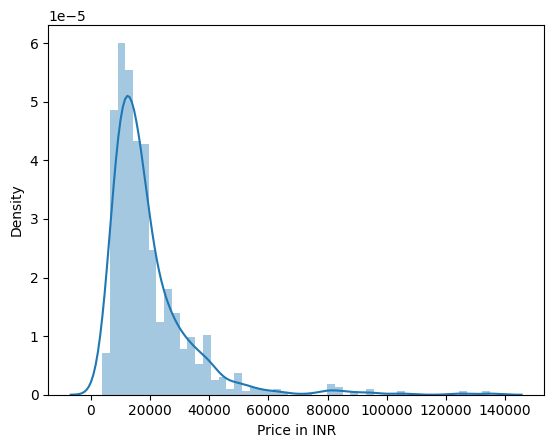

In [42]:
# Membuat histogram dan kurva dari distribusi harga ponsel.
sns.distplot(df['Price in INR'])

<Axes: xlabel='RAM'>

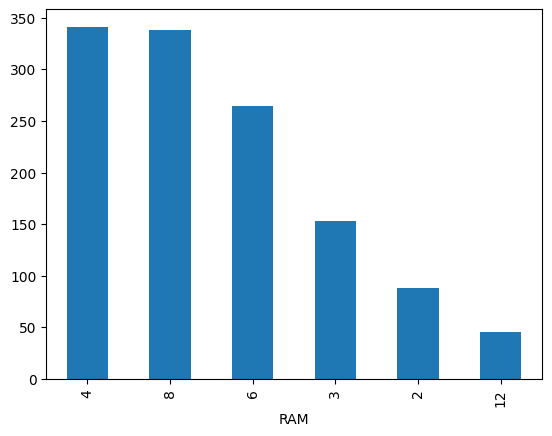

In [43]:
# Membuat plot batang (bar plot) dari frekuensi kemunculan setiap nilai RAM.
df['RAM'].value_counts().plot(kind='bar')

<Axes: xlabel='ROM'>

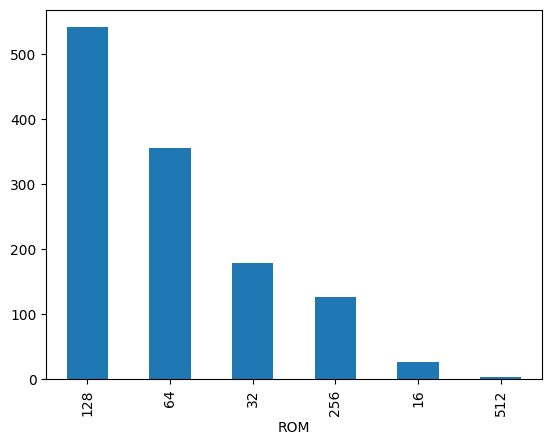

In [44]:
# Membuat plot batang (bar plot) dari frekuensi kemunculan setiap nilai ROM.
df['ROM'].value_counts().plot(kind='bar')

<Axes: xlabel='Upd_Processor'>

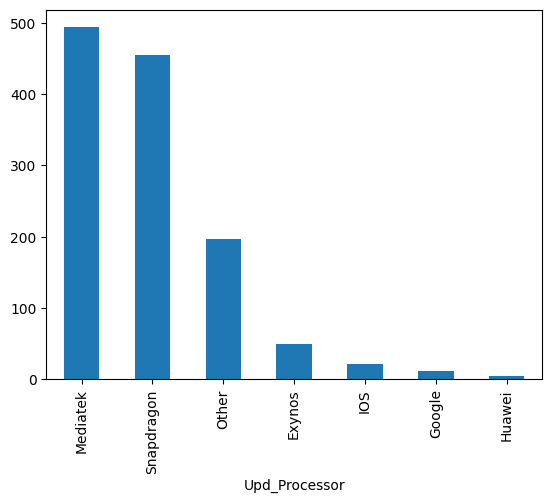

In [45]:
# Membuat plot batang (bar plot) dari frekuensi kemunculan setiap merek prosesor.
df['Upd_Processor'].value_counts().plot(kind='bar')

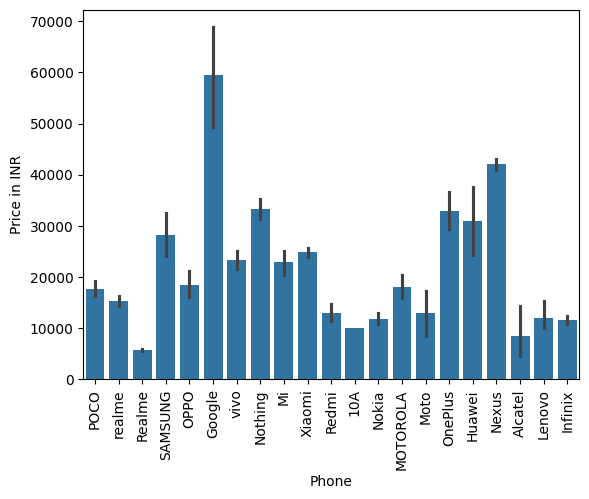

In [46]:
# Membuat bar plot yang menunjukkan rata-rata harga ponsel untuk setiap merek.
sns.barplot(x=df['Phone'], y=df['Price in INR'])

# Memutar label sumbu x agar tidak tumpang tindih.
plt.xticks(rotation='vertical')

# Menampilkan plot.
plt.show()

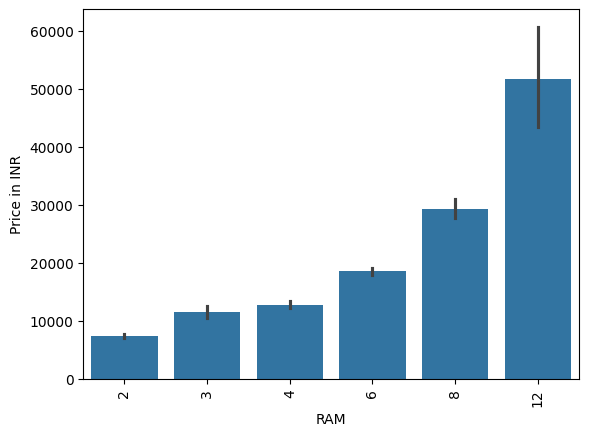

In [47]:
# Membuat bar plot yang menunjukkan rata-rata harga ponsel untuk setiap nilai RAM.
sns.barplot(x=df['RAM'], y=df['Price in INR'])

# Memutar label sumbu x agar tidak tumpang tindih.
plt.xticks(rotation='vertical')

# Menampilkan plot.
plt.show()

/tmp/ipykernel_11805/2549127033.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price in INR']))


<Axes: xlabel='Price in INR', ylabel='Density'>

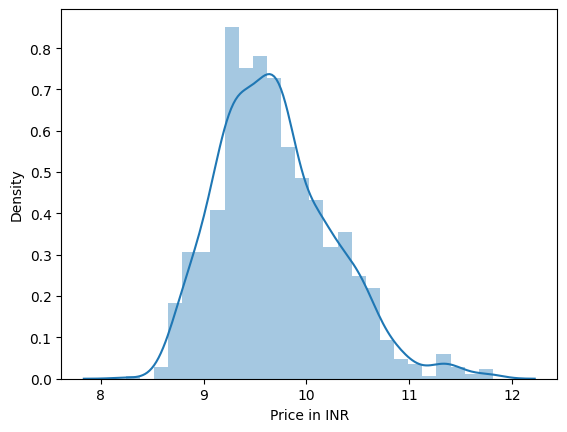

In [48]:
# Membuat histogram dan kurva estimasi kepadatan (KDE) dari distribusi logaritma harga ponsel.
sns.distplot(np.log(df['Price in INR']))

In [49]:
df.dtypes

Phone                 object
Rating               float64
Number of Ratings      int64
RAM                    int64
ROM                    int64
Battery                int64
Price in INR         float64
Size Cam Blkg          int64
Total Cam Blkg         int64
Size Cam Dpn           int64
Total Cam Dpn          int64
Upd_Processor         object
dtype: object

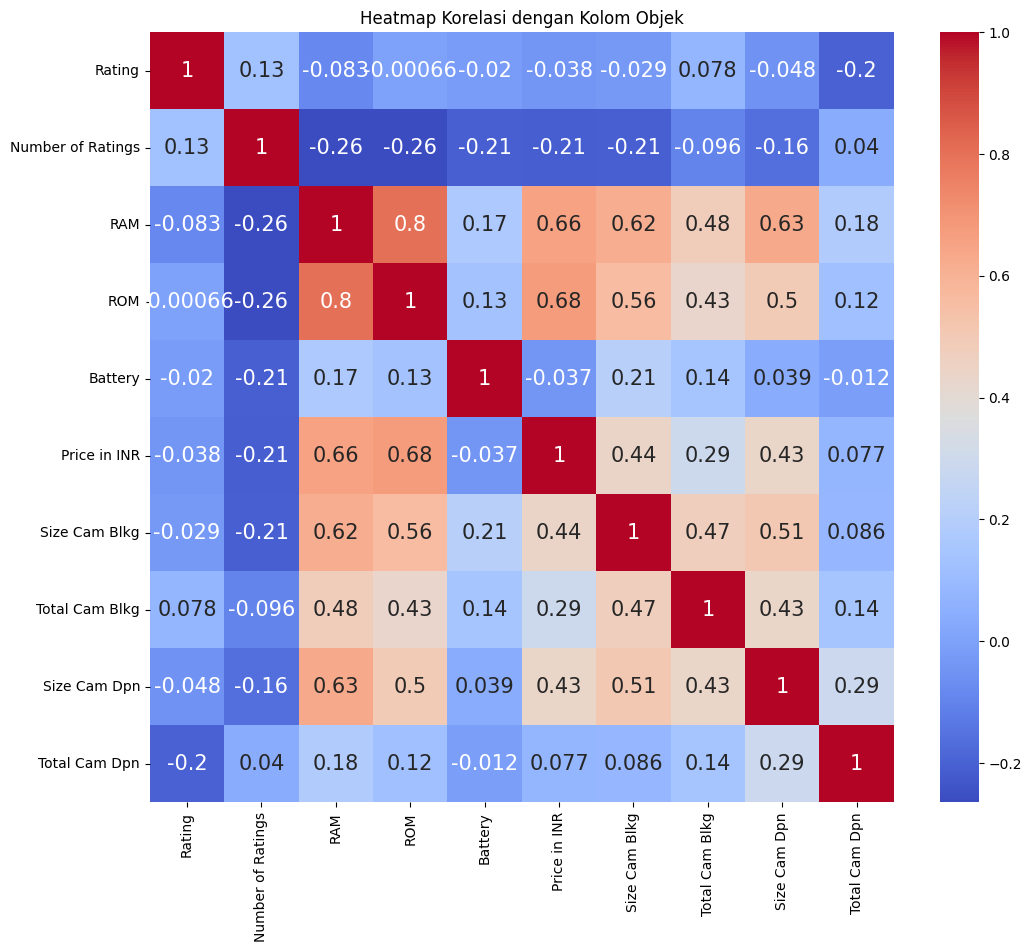

In [50]:
# Menggunakan one-hot encoding untuk kolom objek
df_encoded = pd.get_dummies(df, columns=['Phone', 'Upd_Processor'], drop_first=True)

# Mengambil hanya kolom numerik dari DataFrame yang sudah di-encode
df_numerik = df_encoded.select_dtypes(include=['float64', 'int32', 'int64'])

# Membuat heatmap korelasi dengan ukuran yang lebih besar.
plt.figure(figsize=(12,10))  # Mengatur ukuran figure
sns.heatmap(df_numerik.corr(), annot=True, annot_kws={'size': 15}, cmap='coolwarm')  # Membuat heatmap dengan anotasi
plt.title('Heatmap Korelasi dengan Kolom Objek')
plt.show()  

In [51]:
# Log Transformasi `Price in INR`
df['Price in INR'] = np.log(df['Price in INR'])

df

/tmp/ipykernel_11805/4244880013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price in INR'] = np.log(df['Price in INR'])


,Phone,Rating,Number of Ratings,RAM,ROM,Battery,Price in INR,Size Cam Blkg,Total Cam Blkg,Size Cam Dpn,Total Cam Dpn,Upd_Processor
0,POCO,4.2,33561,2,32,5000,8.639234,8,2,5,1,Mediatek
1,POCO,4.2,77128,4,64,5000,9.392579,50,2,8,1,Mediatek
2,POCO,4.3,15175,4,64,5000,8.853523,8,2,5,1,Mediatek
3,POCO,4.2,22621,4,64,5000,8.955319,50,2,5,1,Mediatek
4,POCO,4.3,15175,4,64,5000,8.853523,8,2,5,1,Mediatek
...,...,...,...,...,...,...,...,...,...,...,...,...
1831,Infinix,4.3,25582,4,64,5000,9.615739,48,4,16,1,Mediatek
1832,Infinix,4.3,25582,4,64,5000,9.615739,48,4,16,1,Mediatek
1833,Infinix,4.3,25582,4,64,5000,9.615739,48,4,16,1,Mediatek
1834,Infinix,4.2,7117,8,128,4500,9.852142,48,4,16,2,Mediatek


In [52]:
# Menghapus kolom 'Number of Ratings' dan 'Rating'
df = df.drop(columns=['Number of Ratings', 'Rating'])